# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto 4</font>
## <font color='blue'>Análise de Dados Para Campanhas de Marketing de Instituições Financeiras</font>

In [9]:
import math
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import watermark 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [10]:
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

### Dataset Loading "Carregando Banco de Dados"

In [12]:
df = pd.read_csv("dados/dataset.csv")

In [13]:
df.shape

(45211, 19)

In [14]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Exploratory Analysis "Analise Exploratoria

In [16]:
# Get information about the dataset " coletando informações dataset" 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [17]:
# We have null values ? nos temos valores ausentes no data . verdadeiro ou falso para valores ausentes 
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [18]:
# Sum null values " soma valores ausentes' 
df.isna().sum()


customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [19]:
# Iremos remover a coluna ID pois se trata de um identificação pouco importante 
  # Drop deleta coluna "CUSTOMER-ID" axis eixo 1 inplace = a imputar exclucão no date set!  
df.drop(["customerid"], axis = 1, inplace = True) 


In [20]:
df.columns # See the list of columns after deletion!  

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [21]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Seratando coluna Job-educação 


In [23]:
# Separar a coluna 'jobedu' em duas novas colunas: 'Job' e 'Education'
#df[['Job', 'Education']] = df['jobedu'].str.split(',', expand=True)
#print(df)

In [24]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

## Tratamento de Valores Ausentes

In [26]:
df.isna().any()

age          True
salary       True
balance     False
marital     False
jobedu      False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month        True
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
dtype: bool

In [27]:
df.isna().sum()

age         20
salary      26
balance      0
marital      0
jobedu       0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
dtype: int64

### tratando Variavel age #

In [29]:
# A linha df.age.isnull().sum() conta quantos valores ausentes (nulos) existem na coluna age do DataFrame df
df.age.isnull().sum()

20

In [30]:
# A linha df.age.isnull().mean()*100 calcula a porcentagem de valores ausentes (nulos) na coluna age do DataFrame df.
df.age.isnull().mean()*100

0.0442370219636814

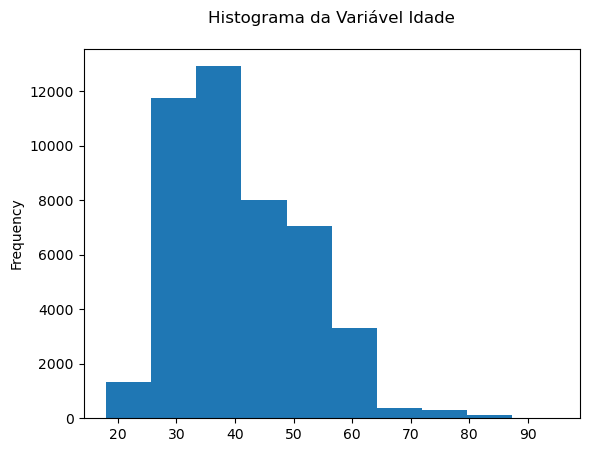

In [31]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

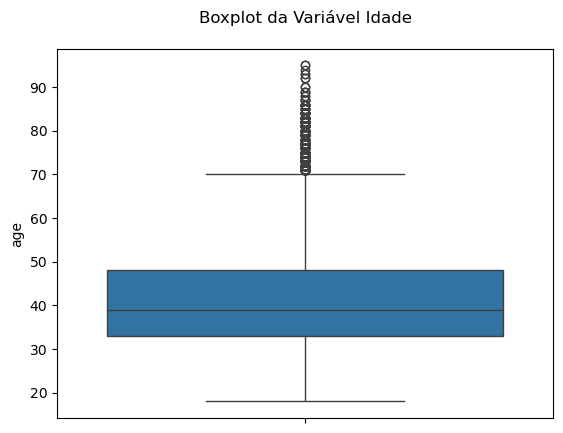

In [32]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

> Exercício 2: Vamos imputar os valores ausentes da variável age com uma medida de tendência central. Escolha uma das medidas, aplique a imputação e justifique sua escolha. Deixamos a variável como float ou como int? Se convertemos, fazemos isso antes ou depois da imputação?

In [34]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93565090394105

In [35]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [36]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
Name: age, dtype: float64

In [37]:
df.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: age
Non-Null Count  Dtype  
--------------  -----  
45191 non-null  float64
dtypes: float64(1)
memory usage: 353.3 KB


In [38]:
# Calculo de porcentagem de valores ausentes em AGE
func_calc_percentual_valores_ausentes(df.age)

O dataset tem 0.04 % de valores ausentes.


In [39]:
df["age"] = df["age"].fillna(df["age"].median()).astype("int64")

In [40]:
convert_to_int(df, ["age"])

In [41]:
df.age

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [42]:
result = df.loc[:10, 'age']
# Exibir o resultado
print(result)

0     58
1     44
2     33
3     47
4     33
5     35
6     28
7     42
8     58
9     43
10    41
Name: age, dtype: int64


In [43]:
df.age.isnull().mean()*100

0.0